In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import util.utils as utl
import importlib
importlib.reload(utl)

utl.process_directory("../data/rsna_minimal/train_images/10004/21057", 
                  "../data/rsna_minimal/train_images/10004/21057-png-nolut",
                  voi_lut=False, og_aspratio=True, resize_to=1024)

In [33]:
from util.utils import generate_mask

masks = generate_mask("../data/rsna_minimal/train_images/10004/21057-png-nolut/180.png",output_mode="binary_mask")

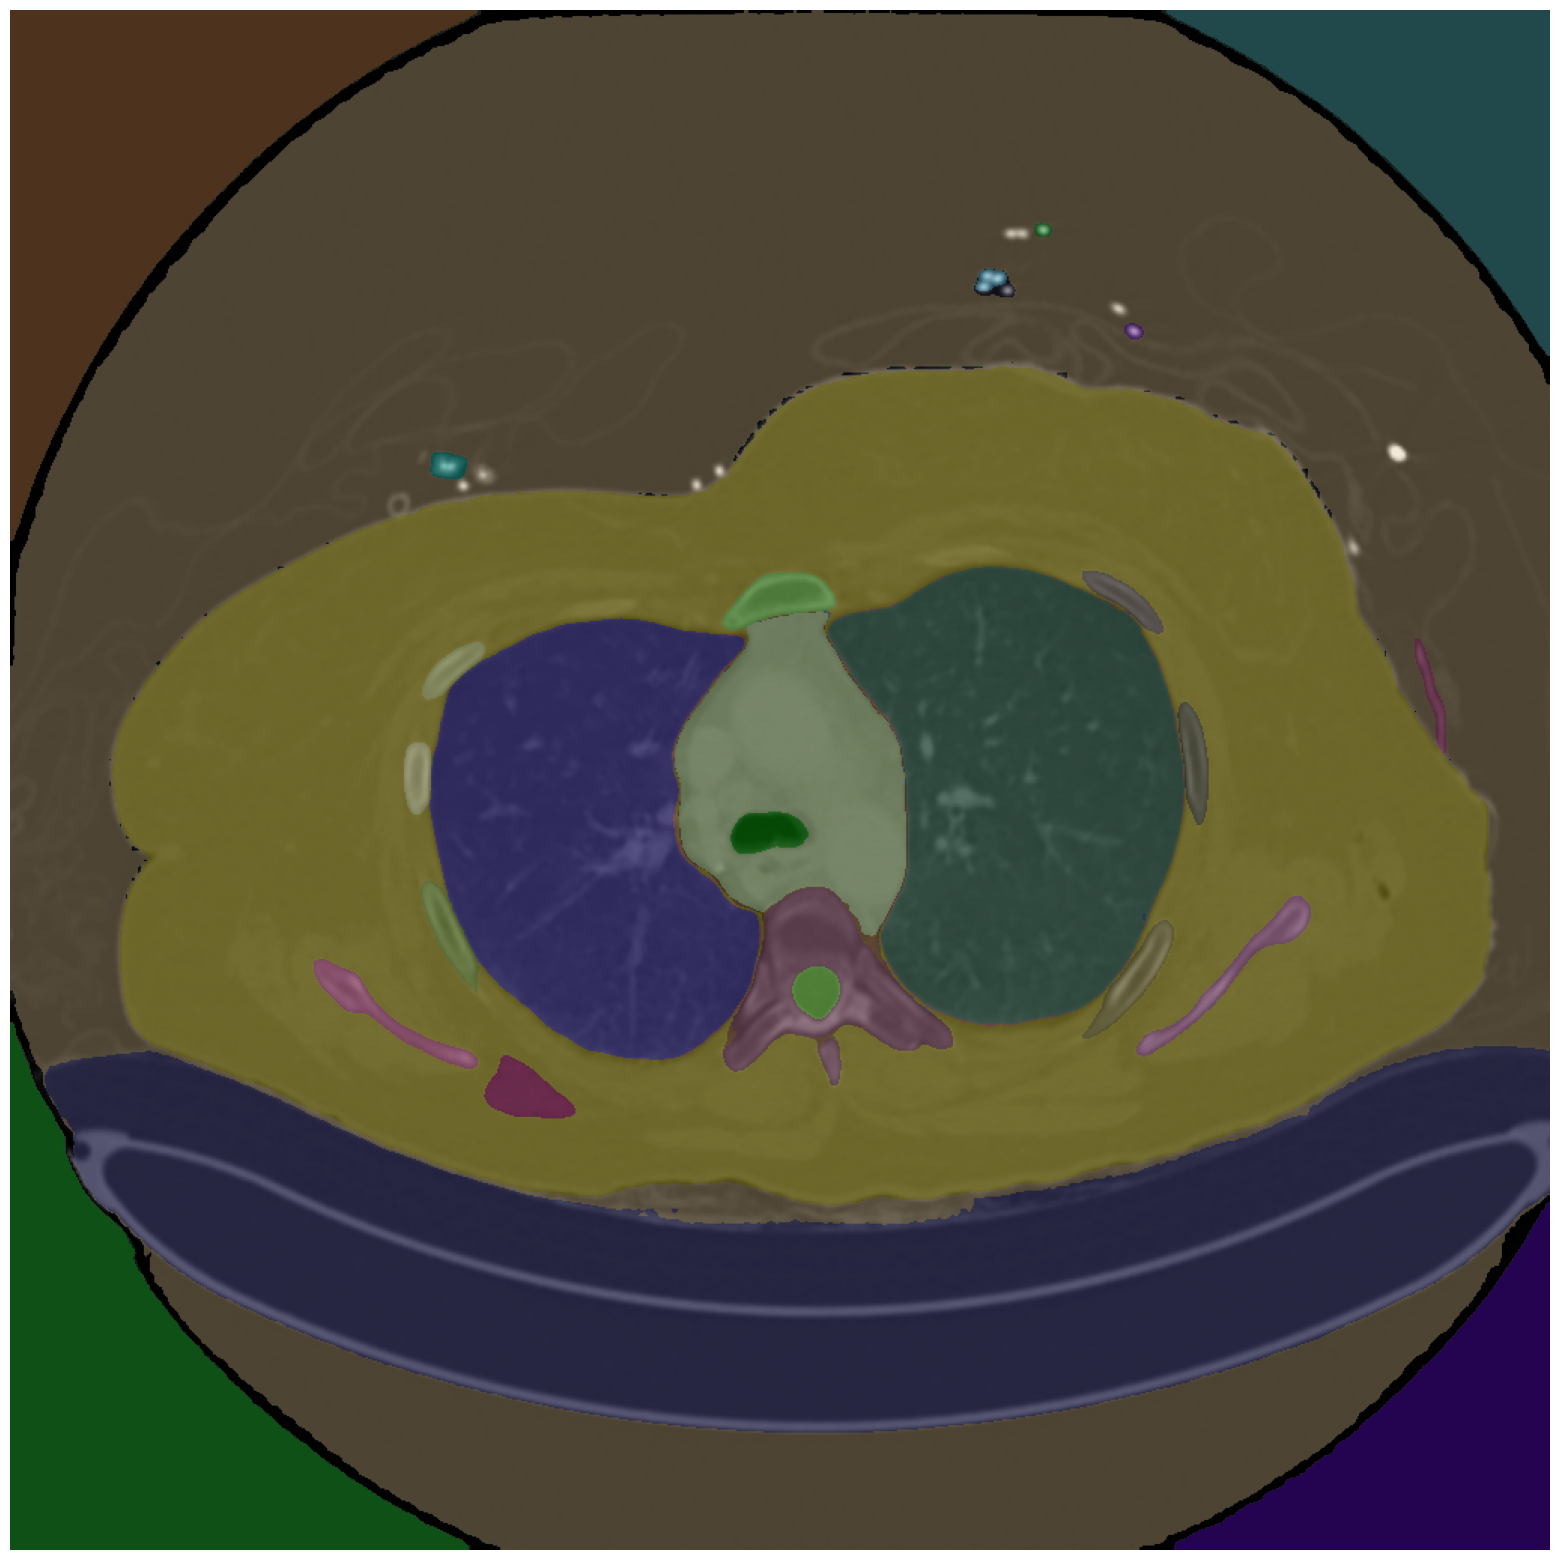

In [34]:
%autoreload 2

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call

def show_anns(anns):
    if not anns:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

cmd = 'chmod +x {s}'.format(s="../data/*")
call([cmd], shell=True)
test = "../data/rsna_minimal/train_images/10004/21057-png-nolut/180.png"
assert os.path.exists(test)
image = cv2.imread(test)
if np.shape(image) == ():
    print("cv2.imread() failed")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    show_anns(masks)
    plt.axis('off')
    plt.show() 